In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
import numpy as np
from dataset import load_hoda

Using TensorFlow backend.


In [2]:
np.random.seed(100)  # for reproducibility

In [3]:
# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=50000,
                                                                        test_sample_size=10000,size=28)

In [4]:
# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [7]:
# test and validation set
x_val = x_test[5000:]
x_test = x_test[:5000]
y_val = y_test[5000:]
y_test = y_test[:5000]

In [8]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [10]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#loading model
from keras.models import load_model
model = load_model("cnn_model.h5")

In [11]:
# 7. Fit model on training data
history = model.fit(x_train, y_train,
          epochs=30, batch_size=256, validation_data = (x_val, y_val))

Train on 50000 samples, validate on 5000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 130us/step - loss: 0.3108 - acc: 0.9037 - val_loss: 0.0592 - val_acc: 0.9804
Epoch 2/30
50000/50000 [==============================] - 4s 84us/step - loss: 0.0852 - acc: 0.9758 - val_loss: 0.0417 - val_acc: 0.9876
Epoch 3/30
50000/50000 [==============================] - 4s 84us/step - loss: 0.0606 - acc: 0.9825 - val_loss: 0.0396 - val_acc: 0.9886
Epoch 4/30
50000/50000 [==============================] - ETA: 0s - loss: 0.0426 - acc: 0.988 - 4s 83us/step - loss: 0.0426 - acc: 0.9880 - val_loss: 0.0317 - val_acc: 0.9908
Epoch 5/30
50000/50000 [==============================] - 4s 83us/step - loss: 0.0341 - acc: 0.9905 - val_loss: 0.0352 - val_acc: 0.9900
Epoch 6/30
50000/50000 [==============================] - 4s 83us/step - loss: 0.0296 - acc: 0.9911 - val_loss: 0.0228 - val_acc: 0.9928
Epoch 7/30
50000/50000 [==============================] - 4s 83us/step - loss: 0.0225 - ac

In [12]:
# 7. Test the model on test data
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019103877175763614
Test accuracy: 0.9952


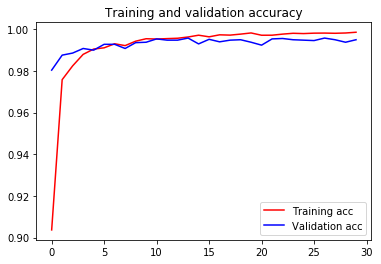

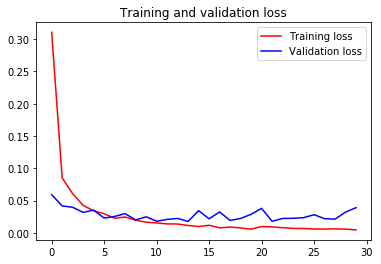

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
#save model
model.save("cnn_model.h5")

In [42]:
def preprocess(img, size=28):
    #resize
    img_9by9 = cv2.resize(img, dsize=(size, size))
    #normalize
    np_img = np.array(img_9by9)
    np_img = np_img.reshape((1,28,28,1))
    np_img = np_img.astype('float32')
    np_img /= 255
    
    return np_img

In [43]:
import cv2

In [53]:
# test the model other handwritten digit
test = cv2.imread("digit31.jpg")
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("digit", thresh)
cv2.waitKey()
cv2.destroyAllWindows()

test_sample = preprocess(thresh)
predicted_class = model.predict_classes([test_sample])
print(predicted_class)

[2]
